# Machine Learning Task: Text Classification with fastText and TextCNN

Objective: Perform sentiment analysis on the IMDb movie review dataset using fastText and TextCNN models. Preprocess the text data, train both models, evaluate their performance (accuracy, F1-score), and compare their results.

Prerequisites: Basic knowledge of Python, machine learning, and natural language processing (NLP). Familiarity with libraries like pandas, numpy, sklearn, tensorflow, and fasttext is helpful.

Tools Needed:

    Python 3.x
    Libraries: pandas, numpy, scikit-learn, tensorflow, fasttext, nltk, datasets (Hugging Face)
    Install dependencies using:



```
pip install pandas numpy scikit-learn tensorflow fasttext nltk datasets
```



Dataset: IMDb movie review dataset from Hugging Face’s datasets library, containing 50,000 reviews labeled as positive or negative.

**Step 1: Set Up the Environment**

Student Instruction: Install and import the required libraries to prepare your Python environment for text processing, model building, and evaluation.

In [2]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313502 sha256=c52cd03bbd858ebd2dfc29220b5ef99640efc5748dafaf6a30b28dafca5f4ef6
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [6]:
!pip install --upgrade datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [8]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import fasttext
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk
nltk.download(['punkt', 'punkt_tab', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Step 2: Acquire and Inspect the Dataset**

Student Instruction: Load the IMDb dataset using the datasets library. Inspect its structure and visualize the class distribution (positive vs. negative reviews).

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


First 5 rows of training data:
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

Class distribution:
label
0    12500
1    12500
Name: count, dtype: int64


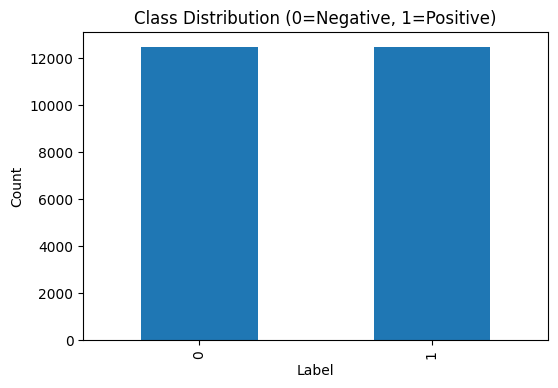

In [4]:
# Load IMDb dataset
dataset = load_dataset('imdb')
train_data = dataset['train']
test_data = dataset['test']

# Convert to pandas DataFrame
train_df = pd.DataFrame({'text': train_data['text'], 'label': train_data['label']})
test_df = pd.DataFrame({'text': test_data['text'], 'label': test_data['label']})

# Inspect the data
print("First 5 rows of training data:")
print(train_df.head())
print("\nTraining data info:")
print(train_df.info())
print("\nClass distribution:")
print(train_df['label'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
train_df['label'].value_counts().plot(kind='bar', title='Class Distribution (0=Negative, 1=Positive)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**Step 3: Preprocess the Data**

Student Instruction: Preprocess the text data by tokenizing, removing stopwords, lemmatizing, and formatting it for fastText and TextCNN. Split the training data into training (80%) and validation (20%) sets.

In [5]:
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

# Split training data into train and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['processed_text'], train_df['label'], test_size=0.2, random_state=42
)

# Prepare data for fastText
# fastText requires data in format: __label__<label> <text>
train_fasttext = [f"__label__{label} {text}" for text, label in zip(train_texts, train_labels)]
val_fasttext = [f"__label__{label} {text}" for text, label in zip(val_texts, val_labels)]
test_fasttext = [f"__label__{label} {text}" for text, label in zip(test_df['processed_text'], test_df['label'])]

# Save fastText data to files
with open('train_fasttext.txt', 'w') as f:
    f.write('\n'.join(train_fasttext))
with open('val_fasttext.txt', 'w') as f:
    f.write('\n'.join(val_fasttext))
with open('test_fasttext.txt', 'w') as f:
    f.write('\n'.join(test_fasttext))

# Prepare data for TextCNN
# Tokenize and pad sequences
max_words = 5000  # Vocabulary size
max_len = 200     # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_df['processed_text'])

train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_df['label'])

print(f"Training data shape (TextCNN): {train_padded.shape}")
print(f"Validation data shape (TextCNN): {val_padded.shape}")
print(f"Test data shape (TextCNN): {test_padded.shape}")

Training data shape (TextCNN): (20000, 200)
Validation data shape (TextCNN): (5000, 200)
Test data shape (TextCNN): (25000, 200)


**Step 4: Build and Train Two Models**

Student Instruction: Train a fastText model and a TextCNN model on the preprocessed data. Evaluate both on the validation set during training.
Model 1: fastText

A simple, efficient model using word embeddings.

In [6]:
# Train fastText model
fasttext_model = fasttext.train_supervised(
    input='train_fasttext.txt',
    epoch=25,
    lr=0.1,
    wordNgrams=2,
    dim=100
)

# Evaluate on validation set
val_predictions = [int(fasttext_model.predict(text)[0][0].replace('__label__', '')) for text in val_fasttext]
val_accuracy_fasttext = accuracy_score(val_labels, val_predictions)
val_f1_fasttext = f1_score(val_labels, val_predictions)

print(f"fastText Validation Accuracy: {val_accuracy_fasttext:.4f}")
print(f"fastText Validation F1-Score: {val_f1_fasttext:.4f}")

fastText Validation Accuracy: 0.8908
fastText Validation F1-Score: 0.8909


**Model 2: TextCNN**

A convolutional neural network for text classification.

In [7]:
# Build TextCNN model
embedding_dim = 100
model_textcnn = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile TextCNN
model_textcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train TextCNN
history_textcnn = model_textcnn.fit(
    train_padded, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_padded, val_labels),
    verbose=1
)

# Evaluate on validation set
val_pred_textcnn = (model_textcnn.predict(val_padded) > 0.5).astype(int).flatten()
val_accuracy_textcnn = accuracy_score(val_labels, val_pred_textcnn)
val_f1_textcnn = f1_score(val_labels, val_pred_textcnn)

print(f"TextCNN Validation Accuracy: {val_accuracy_textcnn:.4f}")
print(f"TextCNN Validation F1-Score: {val_f1_textcnn:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6857 - loss: 0.5548 - val_accuracy: 0.8652 - val_loss: 0.3164
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9065 - loss: 0.2417 - val_accuracy: 0.8574 - val_loss: 0.3265
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9661 - loss: 0.1101 - val_accuracy: 0.8726 - val_loss: 0.3586
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9913 - loss: 0.0367 - val_accuracy: 0.8712 - val_loss: 0.4058
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9981 - loss: 0.0122 - val_accuracy: 0.8732 - val_loss: 0.5231
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.8722 - val_loss: 0.6498
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.8720 - val_loss: 0.6680
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.8622 - val_

**Step 5: Evaluate and Compare Models**

Student Instruction: Evaluate both models on the test set, compute accuracy and F1-score, and visualize their performance. Compare the models based on metrics and training behavior.

fastText Test Accuracy: 0.8826
fastText Test F1-Score: 0.8822
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
TextCNN Test Accuracy: 0.8552
TextCNN Test F1-Score: 0.8605


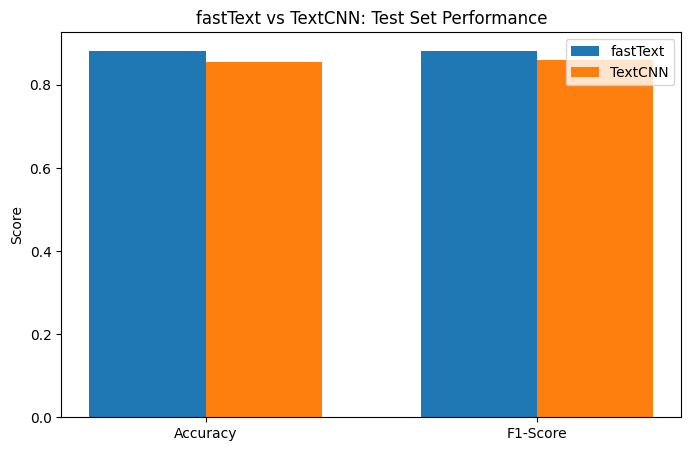

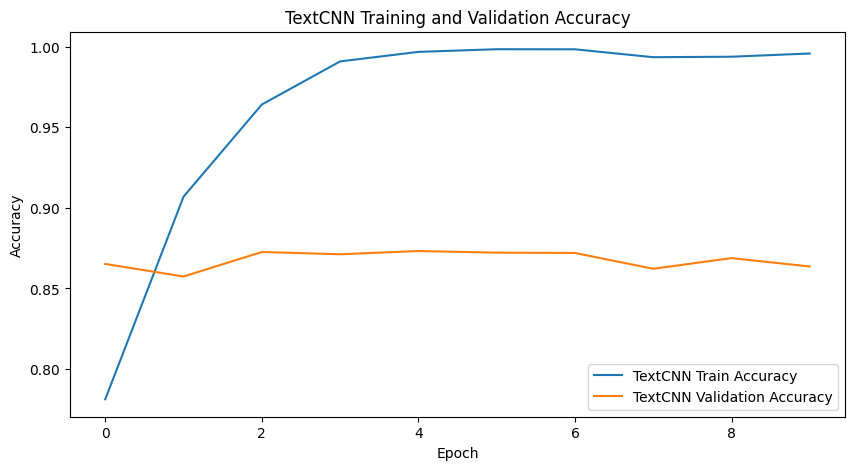

In [8]:
# Evaluate fastText on test set
test_predictions_fasttext = [int(fasttext_model.predict(text)[0][0].replace('__label__', '')) for text in test_fasttext]
test_accuracy_fasttext = accuracy_score(test_labels, test_predictions_fasttext)
test_f1_fasttext = f1_score(test_labels, test_predictions_fasttext)

print(f"fastText Test Accuracy: {test_accuracy_fasttext:.4f}")
print(f"fastText Test F1-Score: {test_f1_fasttext:.4f}")

# Evaluate TextCNN on test set
test_pred_textcnn = (model_textcnn.predict(test_padded) > 0.5).astype(int).flatten()
test_accuracy_textcnn = accuracy_score(test_labels, test_pred_textcnn)
test_f1_textcnn = f1_score(test_labels, test_pred_textcnn)

print(f"TextCNN Test Accuracy: {test_accuracy_textcnn:.4f}")
print(f"TextCNN Test F1-Score: {test_f1_textcnn:.4f}")

# Visualize performance comparison
metrics = ['Accuracy', 'F1-Score']
fasttext_scores = [test_accuracy_fasttext, test_f1_fasttext]
textcnn_scores = [test_accuracy_textcnn, test_f1_textcnn]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, fasttext_scores, width, label='fastText')
ax.bar(x + width/2, textcnn_scores, width, label='TextCNN')
ax.set_ylabel('Score')
ax.set_title('fastText vs TextCNN: Test Set Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

# Visualize TextCNN training history
plt.figure(figsize=(10, 5))
plt.plot(history_textcnn.history['accuracy'], label='TextCNN Train Accuracy')
plt.plot(history_textcnn.history['val_accuracy'], label='TextCNN Validation Accuracy')
plt.title('TextCNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Step 6: Assignment for Students**

Student Instruction: Based on the test metrics, bar plot, and TextCNN training history, answer the following:

    Which model performed better on the test set (higher accuracy/F1-score)? Why might this be (e.g., model complexity, training time)?
    Did TextCNN show signs of overfitting? Analyze the training vs. validation accuracy plot.
    Suggest one improvement for either model (e.g., adjust fastText’s wordNgrams, add more convolutional layers to TextCNN, or use pre-trained embeddings like GloVe).

**Extract Key Words/Phrases for Synthetic Data**

Student Instruction: Preprocess the original reviews to extract frequent words/phrases for positive and negative classes, which will guide synthetic data generation.

In [11]:
from collections import Counter
# Initialize NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

# Extract words by class
positive_texts = train_df[train_df['label'] == 1]['text'].apply(preprocess_text)
negative_texts = train_df[train_df['label'] == 0]['text'].apply(preprocess_text)

# Flatten and count words
positive_words = Counter([word for text in positive_texts for word in text])
negative_words = Counter([word for text in negative_texts for word in text])

# Get top 100 words for each class
top_positive_words = [word for word, _ in positive_words.most_common(100)]
top_negative_words = [word for word, _ in negative_words.most_common(100)]

print("Top 10 positive words:", top_positive_words[:10])
print("Top 10 negative words:", top_negative_words[:10])

Top 10 positive words: ['br', 'film', 'movie', 'one', 'like', 'time', 'good', 'story', 'character', 'great']
Top 10 negative words: ['br', 'movie', 'film', 'one', 'like', 'would', 'even', 'good', 'time', 'bad']


**Generate Synthetic Data**

Student Instruction: Use faker and the extracted words to generate 20,000 synthetic reviews (10,000 positive, 10,000 negative) mimicking IMDb reviews.

In [13]:
! pip install faker
from faker import Faker
import random
# Initialize Faker
faker = Faker()

# Templates for synthetic reviews
positive_templates = [
    "This movie was {word1}! The {word2} acting and {word3} story made it {word4}.",
    "I loved the {word1} plot and {word2} characters. Truly {word3}!",
    "A {word1} film with {word2} moments. The {word3} direction was {word4}.",
]
negative_templates = [
    "This movie was {word1}. The {word2} plot and {word3} acting were {word4}.",
    "I hated the {word1} story and {word2} characters. It was {word3}!",
    "A {word1} film with {word2} scenes. The {word3} direction was {word4}.",
]

# Generate synthetic reviews
def generate_synthetic_review(label):
    if label == 1:
        template = random.choice(positive_templates)
        words = random.sample(top_positive_words, 4)
    else:
        template = random.choice(negative_templates)
        words = random.sample(top_negative_words, 4)
    return template.format(word1=words[0], word2=words[1], word3=words[2], word4=words[3])

# Create synthetic dataset (20,000 reviews)
synthetic_data = []
for _ in range(10000):
    synthetic_data.append({'text': generate_synthetic_review(1), 'label': 1})
    synthetic_data.append({'text': generate_synthetic_review(0), 'label': 0})

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Inspect synthetic data
print("\nSynthetic data sample:")
print(synthetic_df.head())
print("\nSynthetic class distribution:")
print(synthetic_df['label'].value_counts())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.1 MB/s eta 0:00:00

Synthetic data sample:
                                                text  label
0  A little film with friend moments. The actuall...      1
1  A go film with find scenes. The guy direction ...      0
2  I loved the people plot and made characters. T...      1
3  A ever film with time scenes. The actor direct...      0
4  I loved the funny plot and look characters. Tr...      1

Synthetic class distribution:
label
1    10000
0    10000
Name: count, dtype: int64


**Preprocess Synthetic Data**

Student Instruction: Preprocess the synthetic data for fastText and TextCNN, similar to the original data. Split into training (80%) and validation (20%) sets.

In [14]:
# Apply preprocessing
synthetic_df['processed_text'] = synthetic_df['text'].apply(lambda x: ' '.join(preprocess_text(x)))

# Split synthetic data
train_texts_synth, val_texts_synth, train_labels_synth, val_labels_synth = train_test_split(
    synthetic_df['processed_text'], synthetic_df['label'], test_size=0.2, random_state=42
)

# Prepare for fastText
train_fasttext_synth = [f"__label__{label} {text}" for text, label in zip(train_texts_synth, train_labels_synth)]
val_fasttext_synth = [f"__label__{label} {text}" for text, label in zip(val_texts_synth, val_labels_synth)]

# Save fastText data
with open('train_fasttext_synth.txt', 'w') as f:
    f.write('\n'.join(train_fasttext_synth))
with open('val_fasttext_synth.txt', 'w') as f:
    f.write('\n'.join(val_fasttext_synth))

# Prepare for TextCNN
max_words = 5000
max_len = 200
tokenizer_synth = Tokenizer(num_words=max_words)
tokenizer_synth.fit_on_texts(train_texts_synth)

train_sequences_synth = tokenizer_synth.texts_to_sequences(train_texts_synth)
val_sequences_synth = tokenizer_synth.texts_to_sequences(val_texts_synth)

train_padded_synth = pad_sequences(train_sequences_synth, maxlen=max_len, padding='post')
val_padded_synth = pad_sequences(val_sequences_synth, maxlen=max_len, padding='post')

train_labels_synth = np.array(train_labels_synth)
val_labels_synth = np.array(val_labels_synth)

print(f"Synthetic training data shape (TextCNN): {train_padded_synth.shape}")
print(f"Synthetic validation data shape (TextCNN): {val_padded_synth.shape}")

Synthetic training data shape (TextCNN): (16000, 200)
Synthetic validation data shape (TextCNN): (4000, 200)


**Train and Evaluate Models on Synthetic Data**

Student Instruction: Train fastText and TextCNN on the synthetic data and evaluate on the validation set.

In [15]:
# Train fastText on synthetic data
fasttext_model_synth = fasttext.train_supervised(
    input='train_fasttext_synth.txt',
    epoch=25,
    lr=0.1,
    wordNgrams=2,
    dim=100
)

# Evaluate on synthetic validation set
val_predictions_synth = [int(fasttext_model_synth.predict(text)[0][0].replace('__label__', '')) for text in val_fasttext_synth]
val_accuracy_fasttext_synth = accuracy_score(val_labels_synth, val_predictions_synth)
val_f1_fasttext_synth = f1_score(val_labels_synth, val_predictions_synth)

print(f"fastText Synthetic Validation Accuracy: {val_accuracy_fasttext_synth:.4f}")
print(f"fastText Synthetic Validation F1-Score: {val_f1_fasttext_synth:.4f}")

fastText Synthetic Validation Accuracy: 1.0000
fastText Synthetic Validation F1-Score: 1.0000


In [16]:
# Build TextCNN model
embedding_dim = 100
model_textcnn_synth = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile TextCNN
model_textcnn_synth.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train TextCNN
history_textcnn_synth = model_textcnn_synth.fit(
    train_padded_synth, train_labels_synth,
    epochs=10,
    batch_size=32,
    validation_data=(val_padded_synth, val_labels_synth),
    verbose=1
)

# Evaluate on synthetic validation set
val_pred_textcnn_synth = (model_textcnn_synth.predict(val_padded_synth) > 0.5).astype(int).flatten()
val_accuracy_textcnn_synth = accuracy_score(val_labels_synth, val_pred_textcnn_synth)
val_f1_textcnn_synth = f1_score(val_labels_synth, val_pred_textcnn_synth)

print(f"TextCNN Synthetic Validation Accuracy: {val_accuracy_textcnn_synth:.4f}")
print(f"TextCNN Synthetic Validation F1-Score: {val_f1_textcnn_synth:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9600 - loss: 0.1393 - val_accuracy: 1.0000 - val_loss: 9.0632e-06
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6814e-04 - val_accuracy: 1.0000 - val_loss: 1.0670e-06
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 7.4494e-04 - val_accuracy: 1.0000 - val_loss: 1.4824e-06
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 6.0770e-05 - val_accuracy: 1.0000 - val_loss: 1.1748e-06
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2710e-05 - val_accuracy: 1.0000 - val_loss: 1.1148e-06
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1529e-05 - val_accuracy: 1.0000 - val_loss: 7.7240e-07
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.5306e-06 - val_accuracy: 1.0000 - val_loss: 5.6533e-07
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

Question: what do you get for accuracy and f1-score for synthetic data?
why is that?

answer:

***Overly Simplistic Synthetic Data***: The synthetic reviews, generated using fixed templates and a limited set of class-specific words (top 100 positive/negative words), are too predictable. The models can easily distinguish positive from negative reviews because the vocabulary and sentence structures are highly separable (e.g., positive reviews only use "great," "wonderful," etc., while negative ones use "bad," "terrible").

***Data Leakage***: The synthetic data generation process may inadvertently make the validation set too similar to the training set, as both are drawn from the same templates and word lists. This reduces generalization challenges, allowing models to memorize patterns.


***Model Overfitting to Simple Patterns***: Both fastText (using bigrams) and TextCNN (with convolutional layers) are powerful enough to exploit the simplistic patterns in the synthetic data, leading to perfect classification.